<a href="https://colab.research.google.com/github/shfaizan/GenAI/blob/main/Assignment_3_Faizan_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part A:** CIFAR-10 Image Classification with CNN
To study the effects of various modeling aspects on CIFAR-10 image classification using a Convolutional Neural Network (CNN), we'll create multiple models varying one aspect at a time while keeping the others constant. Here's a step-by-step guide:

1. Dataset Preparation
Download CIFAR-10 dataset using Keras.
Normalize the image data.

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In this code, I first print the shapes of the training data arrays to verify their dimensions. Then, I loop through the first five images to display their labels, using `np.argmax` to identify the class for each one.

In [6]:
import numpy as np

# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 5 images and their labels
for i in range(5):
    print(f"Image {i+1} - Label: {np.argmax(y_train[i])}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
Image 1 - Label: 6
Image 2 - Label: 9
Image 3 - Label: 9
Image 4 - Label: 4
Image 5 - Label: 1


Here I defined a function to plot images in a grid with their labels using Matplotlib. Then, I used this function to display the first nine images from my training set, arranged in a 3x3 grid, allowing for visual inspection of the images and their corresponding labels.

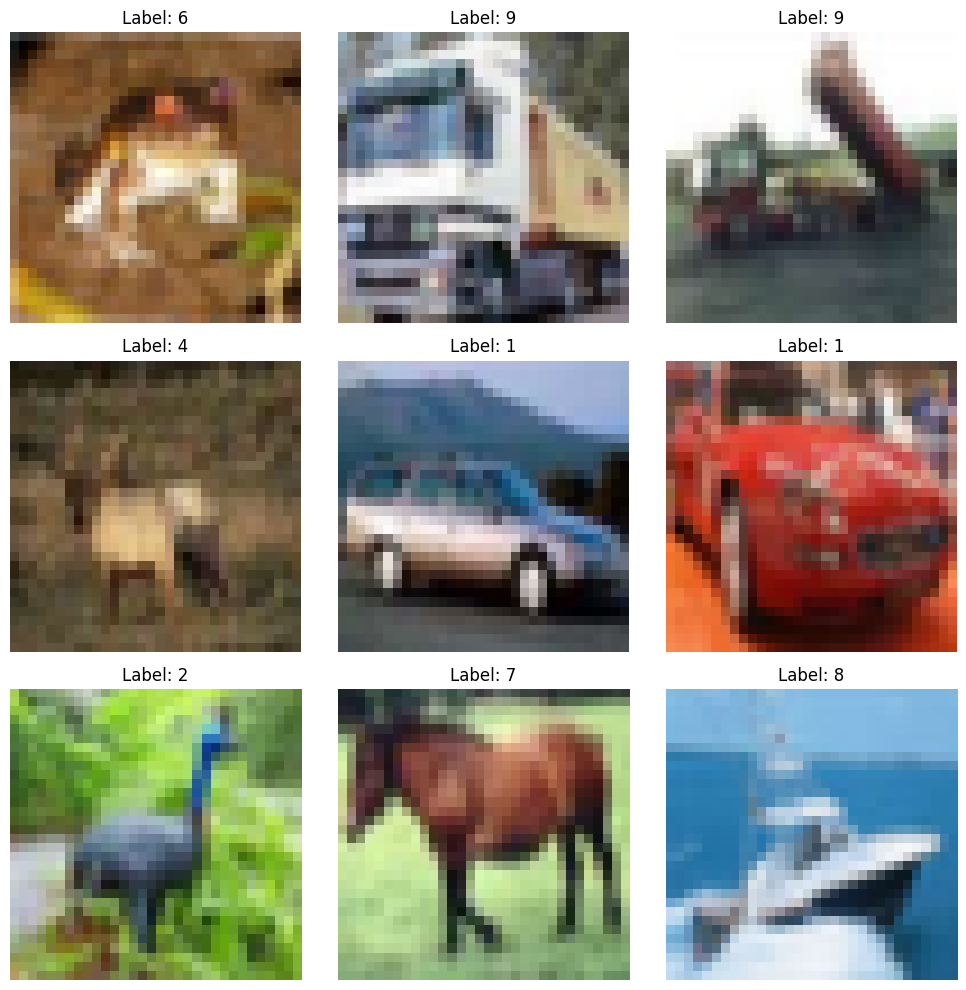

In [15]:
import matplotlib.pyplot as plt

# Function to plot images in a grid
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 9 images from the training set
plot_images(x_train[:9], np.argmax(y_train[:9], axis=1), 3, 3)

I created a baseline convolutional neural network (CNN) model using TensorFlow's Keras API. This model includes two convolutional layers with max pooling, followed by a flattening layer and two dense layers. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and it outputs a summary of its architecture.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = create_baseline_model()
baseline_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 64)               

I created a convolutional neural network (CNN) model with batch normalization layers using TensorFlow's Keras API. This model architecture is similar to the baseline model but includes batch normalization layers after each convolutional layer. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and it outputs a summary of its architecture, including the batch normalization layers.

In [17]:
from tensorflow.keras.layers import BatchNormalization

def create_model_with_batch_norm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_batch_norm = create_model_with_batch_norm()
model_with_batch_norm.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

I created a convolutional neural network (CNN) model with dropout layers using TensorFlow's Keras API. This model architecture is similar to the baseline model but includes dropout layers after each max pooling layer and the dense layer. The dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 during training. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and it outputs a summary of its architecture, including the dropout layers.

In [18]:
from tensorflow.keras.layers import Dropout

def create_model_with_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()
model_with_dropout.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)         

I created a convolutional neural network (CNN) model with additional convolutional layers using TensorFlow's Keras API. This model architecture extends the baseline by adding another convolutional layer with 128 filters after the second max pooling layer. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and it outputs a summary of its architecture.

In [19]:
def create_model_with_more_layers():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_more_layers = create_model_with_more_layers()
model_with_more_layers.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 2, 2, 128)       

I created a convolutional neural network (CNN) model with a specified activation function for all layers using TensorFlow's Keras API. This model architecture is similar to the baseline, but it allows the activation function to be customized. In this instance, the activation function used throughout the model is hyperbolic tangent (tanh). The model is compiled with the Adam optimizer and categorical cross-entropy loss, and it outputs a summary of its architecture.

In [20]:
def create_model_with_different_activation(activation='tanh'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_tanh = create_model_with_different_activation('tanh')
model_with_tanh.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

I created a function `train_and_evaluate_model` that trains and evaluates a given model. This function takes two parameters: the model to be trained and evaluated, and the number of epochs for training (default is 10). It trains the model on the training data (`x_train` and `y_train`) for the specified number of epochs, using the validation data (`x_test` and `y_test`) for validation. After training, it evaluates the model's performance on the test data and returns a tuple containing the training history and the test accuracy.

In [21]:
def train_and_evaluate_model(model, epochs=10):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    return history, test_acc

This code trains and evaluates the baseline model using the `train_and_evaluate_model` function. It stores the training history and the test accuracy in variables `baseline_history` and `baseline_acc`, respectively. Finally, it prints the test accuracy of the baseline model.

In [22]:
# Train and evaluate baseline model
baseline_history, baseline_acc = train_and_evaluate_model(baseline_model)
print(f"Baseline model accuracy: {baseline_acc}")

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4847 - accuracy: 0.4674 - val_loss: 1.2345 - val_accuracy: 0.5626
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1356 - accuracy: 0.6011 - val_loss: 1.0832 - val_accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9980 - accuracy: 0.6523 - val_loss: 1.0070 - val_accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9135 - accuracy: 0.6837 - val_loss: 0.9587 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8499 - accuracy: 0.7049 - val_loss: 0.9101 - val_accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7981 - accuracy: 0.7242 - val_loss: 0.9359 - val_accuracy: 0.6806
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7497 - accuracy: 0.7376 - val_loss: 0.9387 -

This code trains and evaluates the model with batch normalization using the `train_and_evaluate_model` function. It saves the training history and the test accuracy in variables `bn_history` and `bn_acc`, respectively. Finally, it prints the test accuracy of the model with batch normalization.

In [14]:
# Train and evaluate model with batch normalization
bn_history, bn_acc = train_and_evaluate_model(model_with_batch_norm)
print(f"Model with batch normalization accuracy: {bn_acc}")

Epoch 1/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.3168 - accuracy: 0.5370 - val_loss: 1.3327 - val_accuracy: 0.5307
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9643 - accuracy: 0.6627 - val_loss: 0.9595 - val_accuracy: 0.6674
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8152 - accuracy: 0.7159 - val_loss: 1.2427 - val_accuracy: 0.6054
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7179 - accuracy: 0.7479 - val_loss: 0.9766 - val_accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6300 - accuracy: 0.7784 - val_loss: 0.9310 - val_accuracy: 0.6971
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5507 - accuracy: 0.8058 - val_loss: 1.0409 - val_accuracy: 0.6711
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.4871 - accuracy: 0.8278 - val_loss: 1.0360 -

This code trains and evaluates the model with dropout layers using the `train_and_evaluate_model` function. It stores the training history and the test accuracy in variables `dropout_history` and `dropout_acc`, respectively. Finally, it prints the test accuracy of the model with dropout layers.

In [23]:
# Train and evaluate model with dropout
dropout_history, dropout_acc = train_and_evaluate_model(model_with_dropout)
print(f"Model with dropout accuracy: {dropout_acc}")

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.7606 - accuracy: 0.3506 - val_loss: 1.3527 - val_accuracy: 0.5306
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4631 - accuracy: 0.4723 - val_loss: 1.2096 - val_accuracy: 0.5855
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.3575 - accuracy: 0.5139 - val_loss: 1.1800 - val_accuracy: 0.5844
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2905 - accuracy: 0.5396 - val_loss: 1.1012 - val_accuracy: 0.6295
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2503 - accuracy: 0.5581 - val_loss: 1.0830 - val_accuracy: 0.6278
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2128 - accuracy: 0.5694 - val_loss: 1.0168 - val_accuracy: 0.6458
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1858 - accuracy: 0.5782 - val_loss: 0.9886 -

This code trains and evaluates the model with additional convolutional layers using the `train_and_evaluate_model` function. It saves the training history and the test accuracy in variables `more_layers_history` and `more_layers_acc`, respectively. Finally, it prints the test accuracy of the model with more layers.

In [24]:
# Train and evaluate model with more layers
more_layers_history, more_layers_acc = train_and_evaluate_model(model_with_more_layers)
print(f"Model with more layers accuracy: {more_layers_acc}")

Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.5576 - accuracy: 0.4287 - val_loss: 1.2879 - val_accuracy: 0.5332
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1987 - accuracy: 0.5747 - val_loss: 1.1434 - val_accuracy: 0.5954
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0429 - accuracy: 0.6344 - val_loss: 1.0284 - val_accuracy: 0.6419
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9439 - accuracy: 0.6704 - val_loss: 0.9546 - val_accuracy: 0.6688
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8638 - accuracy: 0.6988 - val_loss: 0.9071 - val_accuracy: 0.6838
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8025 - accuracy: 0.7204 - val_loss: 0.9077 - val_accuracy: 0.6898
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7492 - accuracy: 0.7392 - val_loss: 0.8971 -

This code trains and evaluates the model with a hyperbolic tangent (tanh) activation function for all layers using the `train_and_evaluate_model` function. It stores the training history and the test accuracy in variables `tanh_history` and `tanh_acc`, respectively. Finally, it prints the test accuracy of the model with tanh activation function.

In [25]:
# Train and evaluate model with different activation function (tanh)
tanh_history, tanh_acc = train_and_evaluate_model(model_with_tanh)
print(f"Model with tanh activation accuracy: {tanh_acc}")

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.3785 - accuracy: 0.5150 - val_loss: 1.1432 - val_accuracy: 0.5982
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0775 - accuracy: 0.6259 - val_loss: 1.0462 - val_accuracy: 0.6364
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9565 - accuracy: 0.6678 - val_loss: 1.0127 - val_accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8707 - accuracy: 0.6985 - val_loss: 0.9779 - val_accuracy: 0.6645
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7910 - accuracy: 0.7268 - val_loss: 1.0092 - val_accuracy: 0.6541
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7248 - accuracy: 0.7513 - val_loss: 1.0094 - val_accuracy: 0.6564
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6616 - accuracy: 0.7719 - val_loss: 1.0632 -

Based on the above data we can see that model with more layers has highest accuracy. model is build with total of 126730 parameters



---



**Part B:**

Start using ChatGPT and use it to implement a binary classifier of a small textual corpus. For example, given a small number of emails labeled with spam or "not spam", can you use ChatGPT to classify a new email into one of the two classes. Just use OpenAI interface and not API for now.

You are an email classifier. Classify the given email as 'Spam' or 'Not Spam' based on the examples provided.

Examples:
1. "Win a free iPhone now! Click here to claim your prize." [Spam]
2. "Dear John, please find attached the meeting notes from our last call." [Not Spam]
3. "Limited time offer! Get 50% off on all products." [Spam]
4. "Hi Sarah, can you send me the updated project report?" [Not Spam]

Classify the following email:
"Get rich quick with this one simple trick!"

**ChatGPT response:**

Based on the examples provided, the email "Get rich quick with this one simple trick!" would be classified as:

**Spam**

Congratulations! You've been selected for a free cruise. Call now to claim your spot

**ChatGPT response:**

Based on the examples provided, the email "Congratulations! You've been selected for a free cruise. Call now to claim your spot." would be classified as:

**Spam**

Dear max, please find the attached resume

**ChatGPT response:**

Based on the examples provided, the email "Dear Max, please find the attached resume" would be classified as:

**Not Spam**